# Python On Resonance (PyOR)
## Everybody can simulate NMR

Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Tutorial 3: Zeeman and B1 Hamiltonian Part 1
In previous tutorial, we saw how to generate spin operators for more than one spin. Now lets see how to generate Zeeman Hamiltonian (in lab and rotating frame) and B1 (RF field) Hamiltonian for a single spin half system.

## Load Python packages and define path to the source file "PythonOnResonance.py"

In [1]:
pathSource = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_G/Source'

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append(pathSource)

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Generating Spin System

In [3]:
"""
Define Spin quantum numbers of your spins in "Slist1".
Slist1[0] is spin of first particle and Slist1[1] is spin of second particle.
""";

Slist1 = [1/2]

In [4]:
"""
Define Planck constant equals 1. 
Because NMR spectroscopists are more interested to write Energy in frequency units. 
if False then hbarEQ1 = hbar
""";

hbarEQ1 = True

In [5]:
"""
Generate Spin Operators
""";

System = PyOR.Numerical_MR(Slist1,hbarEQ1)

"""
Sx, Sy and Sz Operators
""";
Sx,Sy,Sz = System.SpinOperator()

"""
S+ and S- Operators
""";
Sp,Sm = System.PMoperators(Sx,Sy)

## Pre-defined constants in PyOR
PyoR has predefined Physical constants and Gyrpmagnetic ratios of few nuclei

For example:

In [6]:
print("Planck constant, h = ",System.pl)
print("Planck constant, hbar = ",System.hbar)
print("Permitivity of free space = ",System.ep0)
print("Permeability of free space = ",System.mu0)
print("Boltzmann constant = ",System.kb)

Planck constant, h =  6.626e-34
Planck constant, hbar =  1.054e-34
Permitivity of free space =  8.854e-12
Permeability of free space =  1.2566370614359173e-06
Boltzmann constant =  1.38e-23


In [7]:
print("Gyromagnetic ratio, electron = ",System.gammaE)
print("Gyromagnetic ratio, H1 = ",System.gammaH1)
print("Gyromagnetic ratio, C13 = ",System.gammaC13)

"""
and gyromagnetic ratio of N14, N15, O17 and F19
""";

Gyromagnetic ratio, electron =  -176100000000.0
Gyromagnetic ratio, H1 =  267522000.0
Gyromagnetic ratio, C13 =  67282800.0


## Zeeman Hamiltonian in Lab Frame

Let generate Hamiltonians

In [8]:
"""
Gyromagnetic Ratio
Gamma = [Gyromagnetic Ratio spin 1, Gyromagnetic Ratio spin 1, ...]
""";
Gamma = [System.gammaH1]

"""
Define the field of the spectromter, B0 in Tesla.
"""
B0 = 9.4

"""
Define the chemical Shift of individual spins
Offset = [chemical Shift spin 1, chemical Shift spin 1, ..]
"""
Offset = [20] # Offset frequency in Hz

"""
Function "LarmorF" give the list Larmor frequencies of individual spins in lab frame
"""
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

Larmor Frequency in MHz:  [-400.22803765]


In [9]:
help(System.LarmorFrequency)

Help on method LarmorFrequency in module PythonOnResonance:

LarmorFrequency(Gamma, B0, Offset) method of PythonOnResonance.Numerical_MR instance
    Generate Larmor Frequency, Omega0 in Lab Frame
    INPUT
    -----
    Gamma: List of Gyromagnetic ratios of individual spins
    B0: Field of the spectrometer in Tesla
    Offset: List of the chemical shifts of individual spins
    
    OUTPUT
    ------
    return array of Larmor frequencies of individual spins in lab frame



In [10]:
"""
Generate Zeeman Hamiltonian in Lab frame
""";

In [11]:
help(System.Zeeman)

Help on method Zeeman in module PythonOnResonance:

Zeeman(LarmorF, Sz) method of PythonOnResonance.Numerical_MR instance
    Generating Zeeman Hamiltonian in Lab Frame
    INPUT
    ----
    LarmorF: Array of Larmor frequencies of individual spins in lab frame (LarmorF = System.LarmorFrequency(Gamma,B0,Offset))
    Sz: Sz spin operators
    
    OUTPUT
    ------
    HZ: Zeeman hamiltonian in lab Frame



In [12]:
Hz = System.Zeeman(LarmorF,Sz)

In [13]:
"""
Now lets see how to get the eigen vectors of the Zeman Hamiltonian (lab frame)
""";
B_Z = System.ZBasis_H(Hz)

<IPython.core.display.Latex object>

In [14]:
help(System.ZBasis_H)

Help on method ZBasis_H in module PythonOnResonance:

ZBasis_H(Hz) method of PythonOnResonance.Numerical_MR instance
    "
    Zeeman Basis
    INPUT
    -----
    Hz: Zeman Hamiltonian (lab frame)
    
    OUTPUT
    ------
    return BZ (eigen vectors of Zeman Hamiltonian (lab frame): Bz[0] first eigen vector, Bz[1] second eigen vector, ... )



In [15]:
"""
Matrix representation of the eigen vectors
""";
Matrix(B_Z[0]) # First eigen vector

Matrix([
[1.0],
[  0]])

In [16]:
Matrix(B_Z[1]) # Second eigen vector

Matrix([
[  0],
[1.0]])

## Zeeman Hamiltonian in Rotating Frame

In [17]:
"""
"OmegaRF" is list of rotating frame frequencies
""";
OmegaRF = [-System.gammaH1*B0]

"""
Hamiltonian in the rotating frame
""";
Hzr = System.Zeeman_RotFrame(LarmorF, Sz, OmegaRF)

In [18]:
help(System.Zeeman_RotFrame)

Help on method Zeeman_RotFrame in module PythonOnResonance:

Zeeman_RotFrame(LarmorF, Sz, OmegaRF) method of PythonOnResonance.Numerical_MR instance
    Generating Zeeman Hamiltonian in Rotating Frame
    INPUTS
    ------
    LarmorF: Array of Larmor frequencies of individual spins in lab frame (LarmorF = System.LarmorFrequency(Gamma,B0,Offset))
    Sz: Sz spin operators
    OmegaRF: List of rotating frame frequencies 
             Homonuclear case - All frequencies are the same
             Hetronuclear case - ??
    
    OUTPUT
    ------
    HZ: Zeeman hamiltonian in rotating Frame



<IPython.core.display.Javascript object>


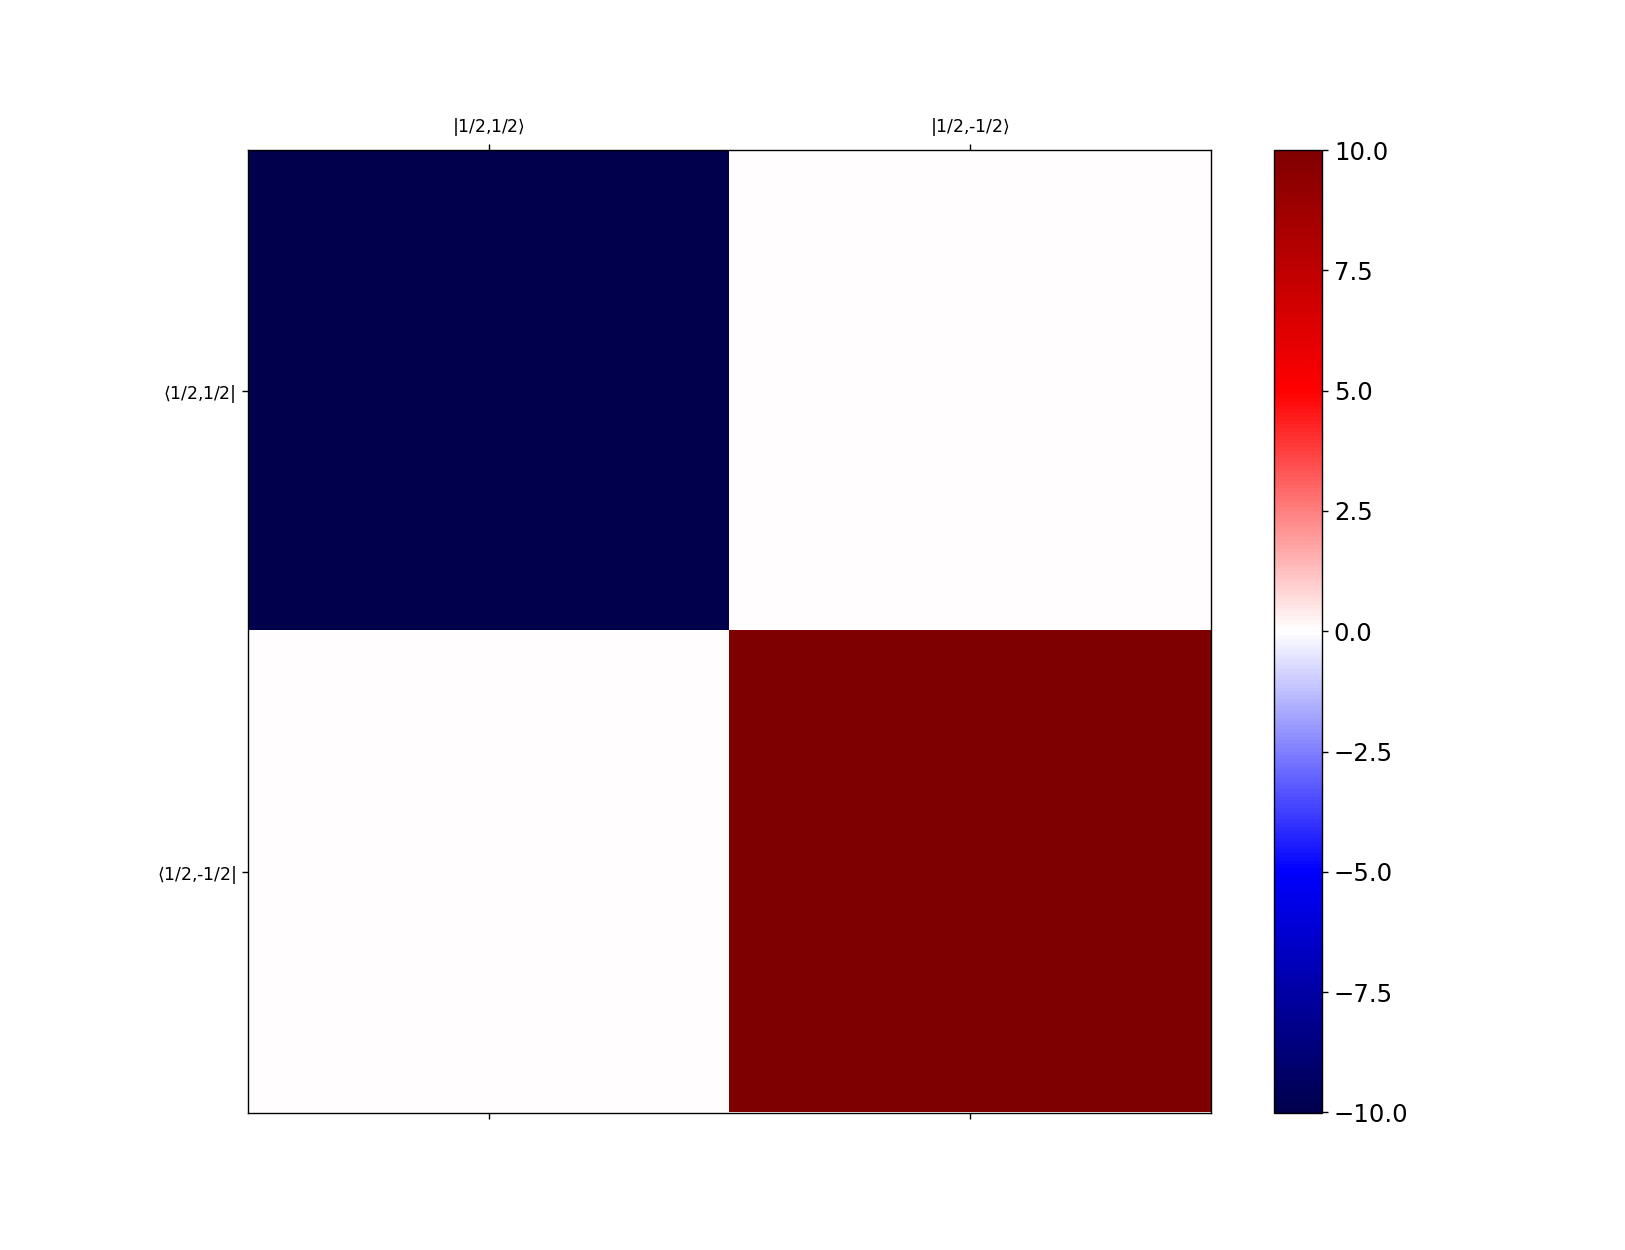

/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_G/Source/PythonOnResonance.py:669: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labelx,fontsize=10)
/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_G/Source/PythonOnResonance.py:670: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labely,fontsize=10)


In [19]:
"""
Representation of Zeeman Hamiltonian in the rotating frame (Unit: Hz)
""";
System.MatrixPlot(1,Hzr.real/2.0/np.pi)

## B1 Field Hamiltonian

In [20]:
"""
So we have a spin half particle sitting at static magnetic field B0 along "Z" direction. 
When a RF field is applied the magnetic dipole of the spin interact with the field and start nutating.
The energy of the particle in this case is given by B1 Field Hamiltonian
""";

"""
List of RF amplitude (Hz) or Nutation frequency, "Omega1"  
""";
Omega1 = [100] # Hz

"""
List of RF signal phase in degree
""";
Omega1Phase = [0] # deg

"""
B1 field hamiltonian
""";
HzB1 = System.Zeeman_B1(Sx,Sy,Omega1,Omega1Phase)

<IPython.core.display.Javascript object>


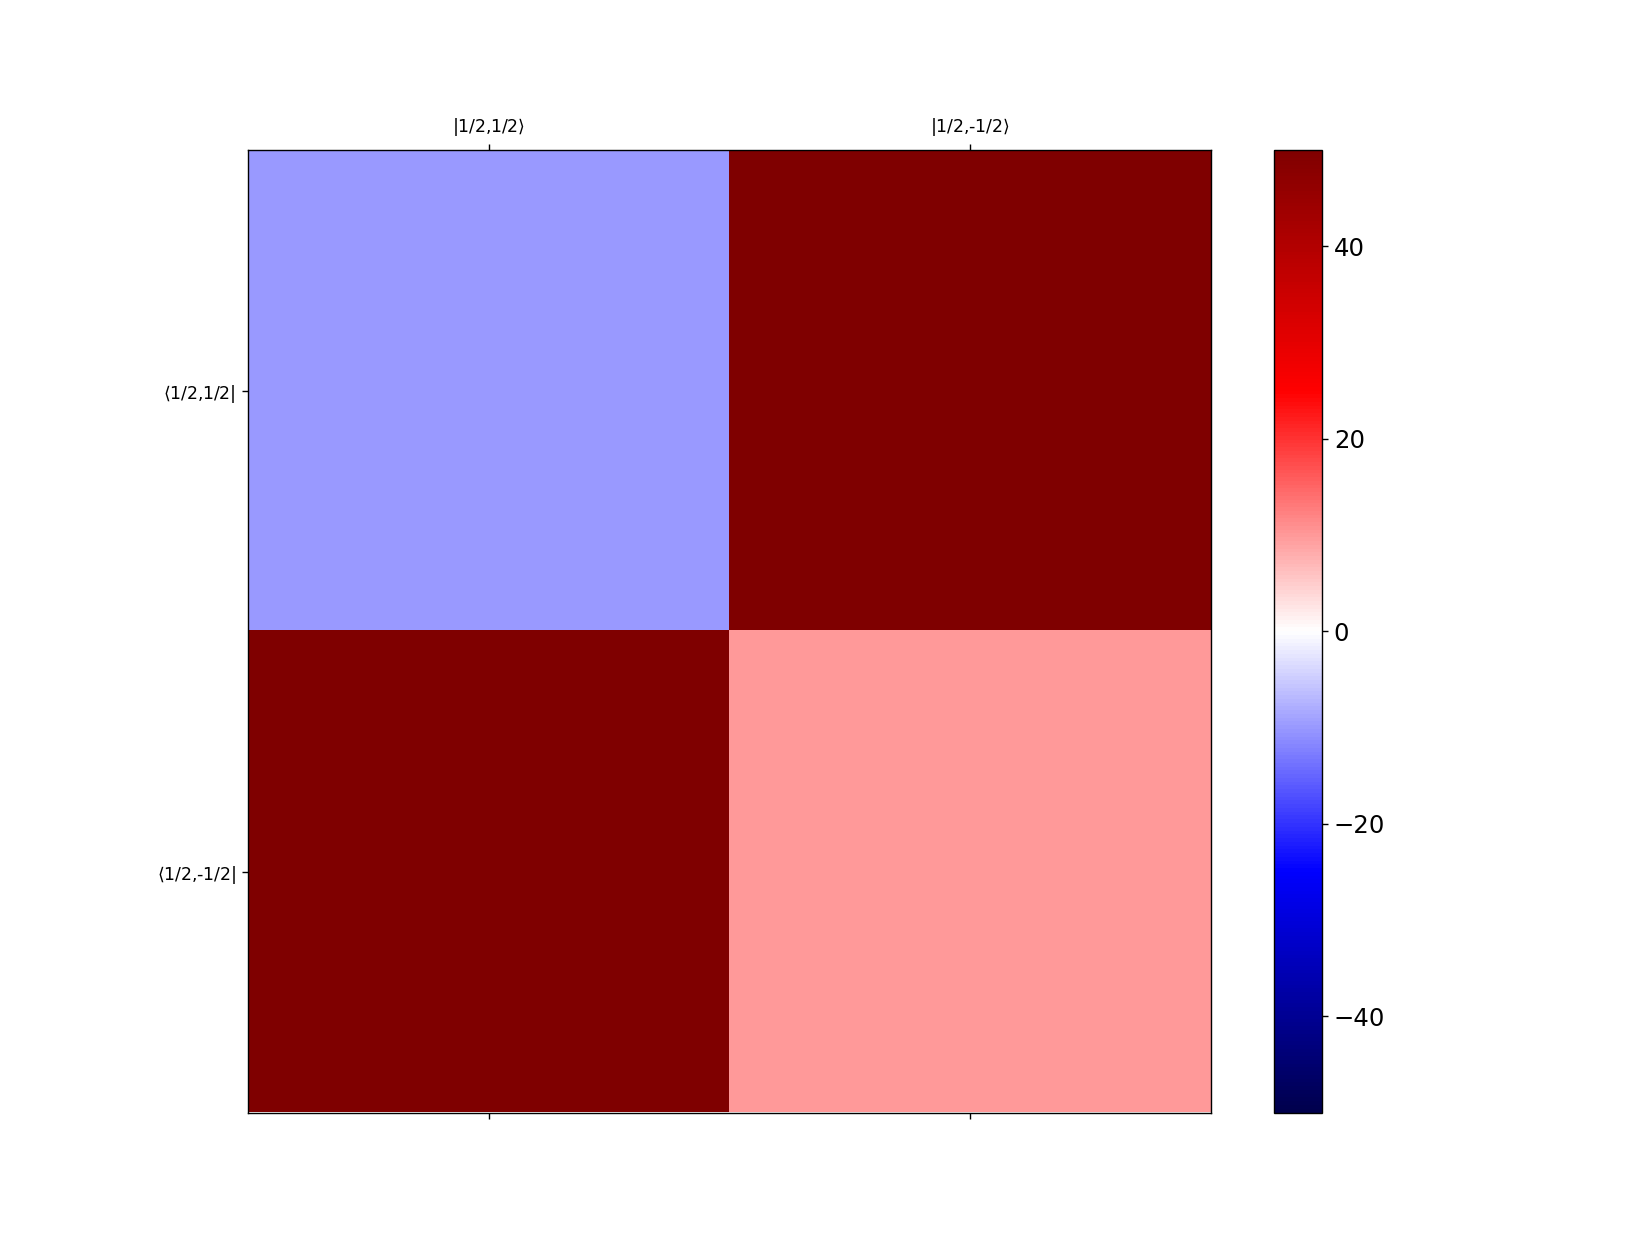

In [21]:
"""
Representation of Zeeman Hamiltonian and B1 Hamiltonian in the rotating frame (Unit: Hz)
""";
Htotal = Hzr + HzB1
System.MatrixPlot(2,Htotal.real/2.0/np.pi)

In [22]:
"""
From above picture we see that the Hamiltonian is not diagonal.
In some future tutorial we will look into it and find the eigen vectors of this Hamiltonian.
""";

## Basis Operators
Let us look into basis operators of spin half particle in cartesian and PMZ (plus minus Z) 

In [23]:
"""
Basis Operators in Cartesian
""";
Basis = 'Cartesian spin half'
B_CarT = System.SingleSpinOP(Sx,Sy,Sz,Sp,Sm,Basis)

<IPython.core.display.Latex object>

In [24]:
"""
Let us look the structure of "B_CarT"
"B_CarT" contain 4 (2x2) basis operator 
""";
B_CarT.shape

(4, 2, 2)

In [25]:
"""
We can call each basis operator by "B_CarT[i]", where 1=0,1,2,3
"""
B_CarT[0]

array([[0.70710678+0.j, 0.        +0.j],
       [0.        +0.j, 0.70710678+0.j]], dtype=complex256)

In [26]:
"""
Basis Operators in PMZ
""";
Basis = 'PMZ spin half'
B_PMZ = System.SingleSpinOP(Sx,Sy,Sz,Sp,Sm,Basis)

<IPython.core.display.Latex object>

In [27]:
"""
We can call each basis operator by "B_PMZ[i]", where 1=0,1,2,3
"""
B_PMZ[0]

array([[0.70710678+0.j, 0.        +0.j],
       [0.        +0.j, 0.70710678+0.j]], dtype=complex256)

## Next tutorial: Zeeman and B1 Hamiltonian part 2
In this lecture you will see how to generate Zeeman Hamiltonian (lab and rotating frame) and B1 field Hamiltonian for 2 Spin half particles

## Any suggestion? write to me
If you see something is wrong please write to me, so that the PyOR can be error free. 

vineethfrancis.physics@gmail.com